In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
%matplotlib inline

In [2]:
def pre_process_data(data):
    """
        Accepts a dataframe as input, performs pre-processing and returns (x, y, col_names)
        
        x (an ndarray) is the feature matrix of size (N X M) where M is the no:of examples
        and N is the no:of features
        
        y (an ndarray) contains actual results (of size (1 X M))
        
        col_names is a python list which contains the name of the columns present in y and x (of size ((N + 1) X 1))
        
        Note: The first element in col_names is the column name for y, the
        subsequent names are the names of features present in X
    """
    
    # Drop nan rows
    data = data.dropna()
    print("Shape of data after dropping NaN rows: " + str(data.shape))
    
    # Add a serial number column
    data.insert(0, 'id', range(len(data)))

    cols = data.columns.tolist()
    cols = cols[-1:] + cols[1:-1]
    data = data[cols]

    col_names = ['admitted', 'exam1_score', 'exam2_score']
    data = data[col_names]

    # Convert the data into numpy array
    data = data.values

    # Extract input and output variables
    y = data[:,:1]
    x = data[:,1:]

#     # Visualize them
#     for i in range(x.shape[1]):
#         feature = x[:,i].reshape(x.shape[0], 1)
#         fig = plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
#         plt.plot(feature, y, 'bo', markersize=5, label=col_names[i + 1])
#         plt.legend(loc='upper left')
    
    return (x.T, y.T, col_names)

In [3]:
def split_dataset(x, y, train_per, dev_per, test_per):
    """
        Splits dataset (i.e. x, y) into 3 parts, specified by their percentages
        Example: split_dataset(x, y, 80, 10, 10) will split x and y into the following:
        
        train: 80%
        dev: 10%
        test: 10%
        
        Note: x and y should be ndarray's of size: (N X M) where M is the no:of examples and N is some number
        
        Note: You can give one of the percentage as 0. For instance, if you give (70, 0, 30), then
        dev set size will be zero!
    """
    
    new_x = x.T
    new_y = y.T
    
    rows = new_x.shape[0]
    cols = new_x.shape[1]
    
    combined = np.hstack((new_x, new_y))
    np.random.shuffle(combined)
    
    new_x = combined[:,:cols]
    new_y = combined[:,cols:]
    
    train_size = int((train_per / 100) * rows)
    dev_size = int((dev_per / 100) * rows)
    test_size = int((test_per / 100) * rows)

    print("Total size: " + str(rows) + " Train size: " + str(train_size) +
          " Dev size: " + str(dev_size) + " Test size: " + str(test_size))
    
    train_x = new_x[:train_size]
    dev_x = new_x[train_size:train_size + dev_size]
    test_x = new_x[train_size + dev_size:]
    
    train_y = new_y[:train_size]
    dev_y = new_y[train_size:train_size + dev_size]
    test_y = new_y[train_size + dev_size:]
    
    return (train_x.T, dev_x.T, test_x.T, train_y.T, dev_y.T, test_y.T)

In [4]:
def normalize(vec):
    """
        vec is a row/column vector
        Returns a normalized vector (a new one, doesn't modify the parameter)
    """
    mew = np.average(vec)
    std = np.std(vec)
    return (mew, std, (vec - mew)/std)

In [5]:
def de_normalize(mew, std, vec):
    """
        mew and std are numbers denoting the original mean and standard deviation of the vector
        Returns the denormalized vector (a new one, doesn't modify the parameter)
    """
    return ((vec * std) + mew) 

In [6]:
def plot_binary_class_figure(x, y, w, b):

    admits = x[:,np.nonzero(y == 1)].reshape(-1, x.shape[0])
    rejects = x[:,np.nonzero(y == 0)].reshape(-1, x.shape[0])
    
    x_values = np.linspace(-3, 3, 10).reshape(-1, 1)
    decision_boundary = (-1/w[1][0]) * (b + w[0][0] * x_values)
    
    fig = plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot(admits[:,0], admits[:,1], 'bo', markersize=5, label="Admitted")
    plt.plot(rejects[:,0], rejects[:,1], 'ro', markersize=5, label="Rejected")
    plt.plot(x_values, decision_boundary)
    plt.legend(loc='upper left')

In [7]:
def plot_input_data(x, y):

    admits = x[:,np.nonzero(y == 1)].reshape(-1, x.shape[0])
    rejects = x[:,np.nonzero(y == 0)].reshape(-1, x.shape[0])
    
    fig = plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot(admits[:,0], admits[:,1], 'bo', markersize=5, label="Admitted")
    plt.plot(rejects[:,0], rejects[:,1], 'ro', markersize=5, label="Rejected")
    plt.legend(loc='upper left')

In [8]:
def sigmoid(z):
    """
    Computes the sigmoid of z
    """
    return 1/(1 + np.exp(-z))

In [9]:
def cross_entropy_loss(w, b, X, Y, lambd):
    """
    Implements the cross_entropy_loss function and its gradient for the propagation

    Arguments:
    w -- weights, a numpy array of size (N, 1)
    b -- bias, a scalar
    X -- data of size (N, M)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, M)

    Return:
    cost -- cost for logistic regression
    dw -- gradient of the loss with respect to w
    db -- gradient of the loss with respect to b
    """
    
    m = X.shape[1]
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    cost = (-1/m) * np.sum((Y * np.log(A) + (1 - Y) * np.log(1 - A)), axis=1, keepdims=True)
    
    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y, axis=1, keepdims=True)

    cost = np.squeeze(cost)
    
    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [10]:
def optimize(w, b, X, Y, loss_function, num_iterations, learning_rate, lambd):
    """
    Optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, of size (N, 1)
    b -- bias, a scalar
    X -- data of shape (N, M)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    loss_function - loss function to be used
    learning_rate and lambd are hyperparameters

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the loss function
    costs -- list of all the costs computed during the optimization (useful to plot the learning curve)
    """
    
    costs = []
    
    for i in range(num_iterations):
        grads, cost = loss_function(w, b, X, Y, lambd)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate * dw
        b = b - learning_rate * db
        costs.append(cost)
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [11]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, of size (N, 1)
    b -- bias, a scalar
    X -- data of size (N, M)
    
    Returns:
    Y_prediction -- vector containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    Y_prediction = (A > 0.5).astype(int)

    return Y_prediction

In [12]:
def model(X_train, Y_train, X_test, Y_test, num_initializations, num_iterations,
          learning_rate, lambd, loss_function, plot_cost = False):
    """
    Logistic regression model
    
    Arguments:
    X_train of shape (N, m_train)
    Y_train of shape (1, m_train)
    X_test of shape (N, m_test)
    Y_test of shape (1, m_test)
    num_initializations - if 0, then does zero initialization of weights, else does random initialization
                            the specified no:of times, and returns the best model
    num_iterations - number of times to run gradient descent
    loss_function - loss function to be used
    learning_rate - it is the hyperparameter alpha
    lambd - hyperparameter for overfitting
    """
    
    # initialize parameters with zeros
    w = np.zeros((X_train.shape[0], 1))
    b = 0

    if(num_initializations != 0):
        w = np.random.rand(X_train.shape[0], 1)
        b = np.squeeze(np.random.rand(1, 1))
        
    
    global_min_costs = [sys.maxsize]
    global_parameters = {}
    global_gradients = {}
    fig = plt.figure(figsize=(9, 9), dpi= 80, facecolor='w', edgecolor='k')
    
    while True:
        
        # Gradient descent
        parameters, grads, costs = optimize(w, b, X_train, Y_train, loss_function,
                                            num_iterations, learning_rate, lambd)

        # Plot the gradient descent progress
        if(plot_cost):
            plt.title("Learning rate = " + str(learning_rate))
            plt.xlabel("iterations")
            plt.ylabel("cross entropy cost")
            plt.plot(costs)
            
        num_initializations = num_initializations - 1
        if(num_initializations <= 0):
            global_min_costs = costs
            global_parameters = parameters
            global_gradients = grads
            break
        else:
            min_cost = costs[len(costs) - 1]
            global_min_cost = global_min_costs[len(global_min_costs) - 1]
            if(min_cost < global_min_cost):
                global_min_costs = costs
                global_parameters = parameters
                global_gradients = grads
            w = np.random.rand(X_train.shape[0], 1)
            b = np.squeeze(np.random.rand(1, 1))
    
    w = global_parameters["w"]
    b = global_parameters["b"]
    
    # Predict on test and training examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    print("Train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("Test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {"cost": global_min_costs[len(global_min_costs) - 1],
         "w" : w, 
         "b" : b}
    
    return d

Shape of data read: (100, 3)
Shape of data after dropping NaN rows: (100, 3)
Shape of data after pre-processing - X: (2, 100) and Y: (1, 100)
Total size: 100 Train size: 80 Dev size: 0 Test size: 20
Train accuracy: 90.0 %
Test accuracy: 85.0 %
Min cost is: 0.2092499670013892
Weights are:
W: [[3.07458485]
 [2.69607084]]
b: [[0.99635929]]


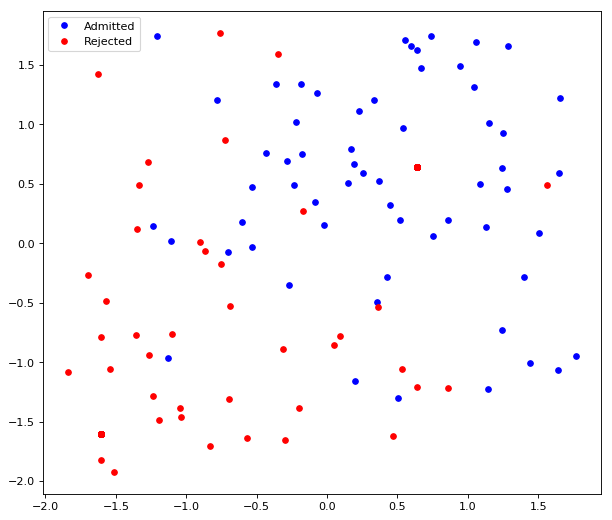

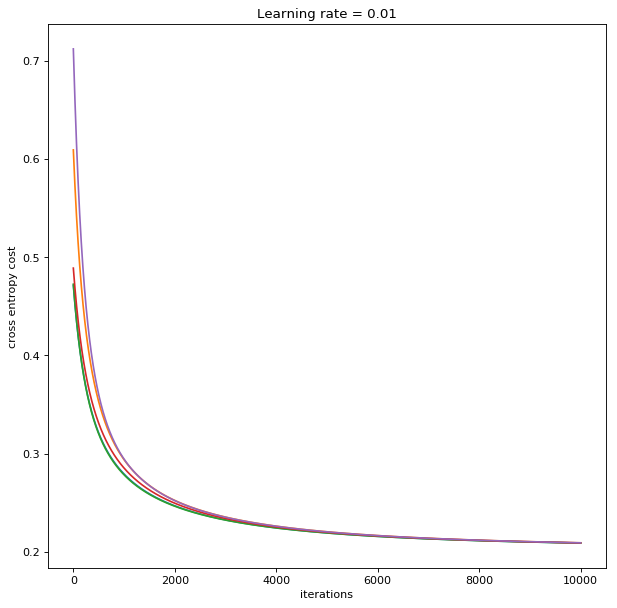

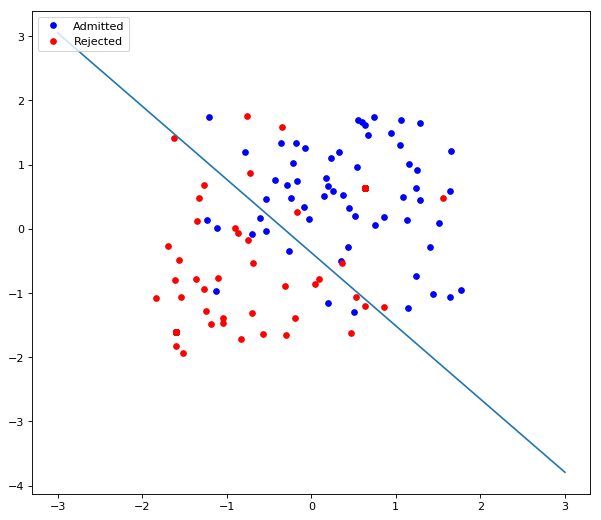

In [16]:
# Read data from text file
data = pd.read_csv('data.csv')
print("Shape of data read: " + str(data.shape))

# Preprocess the data
(x, y, col_names) = pre_process_data(data)
print("Shape of data after pre-processing - X: " + str(x.shape) + " and Y: " + str(y.shape))
M = x.shape[1]
N = x.shape[0]

# Normalize features
mew_X = []
std_X = []
for i in range(N):
    (mew_val, std_val, x[i,:]) = normalize(x[i,:])
    mew_X.append(mew_val)
    std_X.append(std_val)
    
plot_input_data(x, y)

# Split the dataset
(X_train, X_dev, X_test, Y_train, Y_dev, Y_test) = split_dataset(x, y, 80, 0, 20)

# Set the regularization parameter
lambd = 1.5

results = model(X_train, Y_train, X_test, Y_test, 5, 10000, 0.01, lambd,
                cross_entropy_loss, plot_cost=True)

print("Min cost is: " + str(results["cost"]))
print("Weights are:\nW: " + str(results["w"]) + "\nb: " + str(results["b"]))


plot_binary_class_figure(x, y, results["w"], results["b"])